In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r"car_sales.csv", encoding="utf-8")

In [44]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [46]:
# Get rid of missing values
# Get the most popular manufacturer by the number of cars sold
# Get the percentage of total cars sold
# Find 3 most expensive cars

In [48]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [50]:
df.dropna(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    float64


In [54]:
manufacturer = df.groupby("Manufacturer")[["Sales_in_thousands"]].sum()
total_sales = df["Sales_in_thousands"].sum()
manufacturer["Sales_in_percentage"] = manufacturer["Sales_in_thousands"] / total_sales
manufacturer["Sales_in_percentage"] = manufacturer["Sales_in_percentage"].round(2)
manufacturer.nlargest(5, "Sales_in_thousands")

,Sales_in_thousands,Sales_in_percentage
Manufacturer,,
Ford,1846.965,0.27
Dodge,720.798,0.10
Toyota,675.086,0.10
Honda,592.674,0.09
Chevrolet,446.370,0.06


In [56]:
manufacturer.sort_values("Sales_in_thousands", ascending=False, inplace=True)
manufacturer.head()

,Sales_in_thousands,Sales_in_percentage
Manufacturer,,
Ford,1846.965,0.27
Dodge,720.798,0.10
Toyota,675.086,0.10
Honda,592.674,0.09
Chevrolet,446.370,0.06


In [58]:
# plot top 5 as bar chart

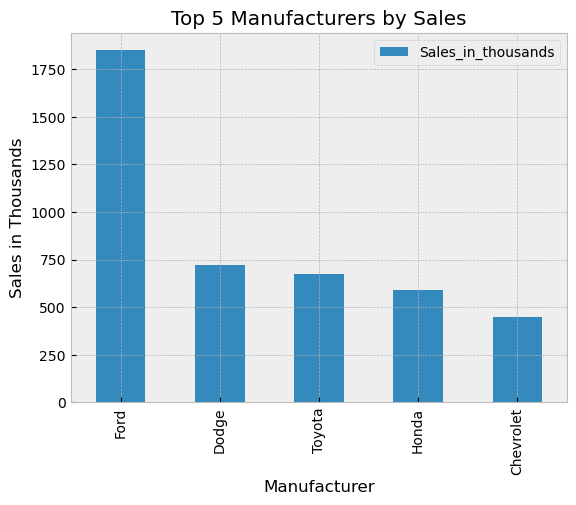

In [60]:
top_5 = manufacturer[["Sales_in_thousands"]].head(5)
top_5.plot.bar()

plt.style.use("bmh")
plt.ylabel("Sales in Thousands")
plt.title("Top 5 Manufacturers by Sales")
plt.savefig("top-5-make.png")
plt.show()

In [61]:
# Find 3 most expensive cars
# Fiund correlation among car attributes

In [64]:
df.nlargest(3, "Price_in_thousands")

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.60,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294
126,Porsche,Carrera Cabrio,1.866,67.550,Passenger,74.97,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710
125,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.02,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975


In [38]:
c = df.corr(numeric_only=True)
c.sort_values("Price_in_thousands", ascending=False, inplace=True)
c.insert(0, "Price_in_thousands", c.pop('Price_in_thousands'))

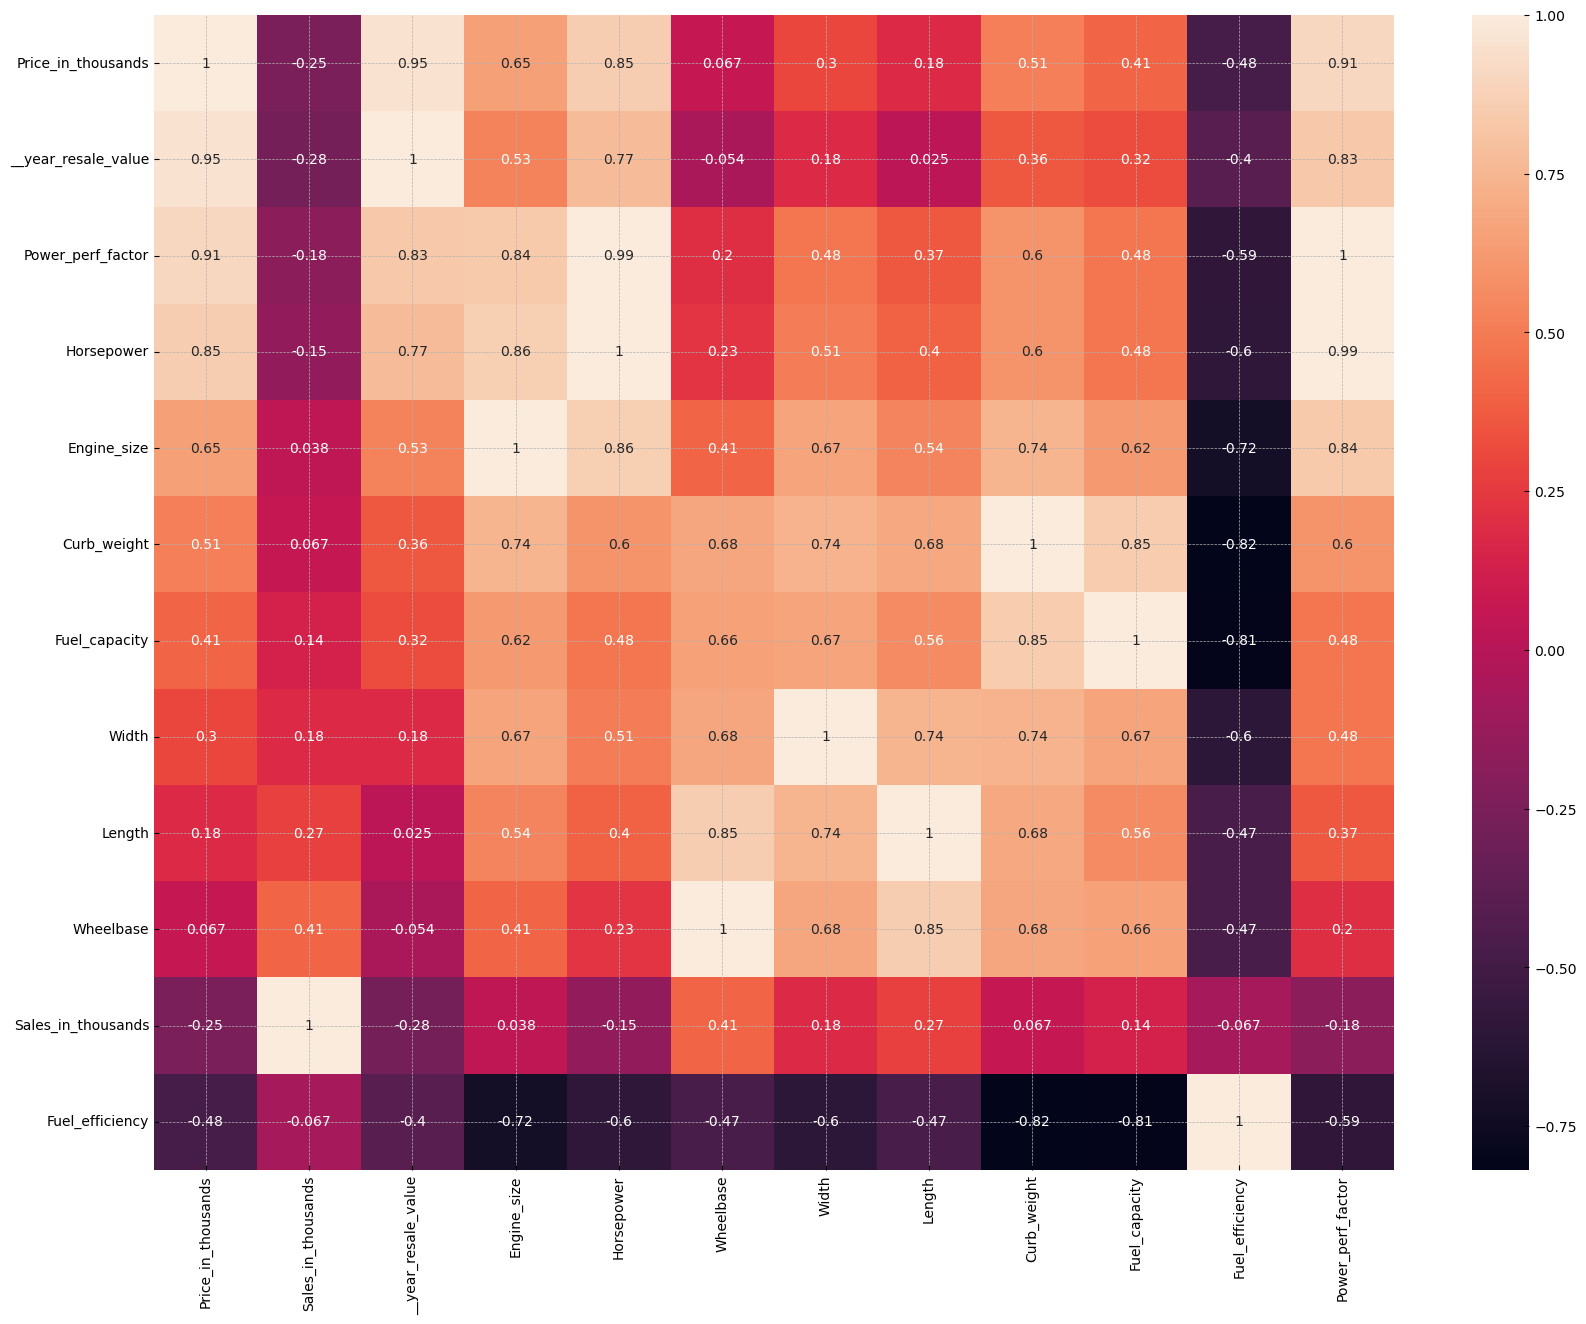

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(c, annot=True)
plt.show()